#Project Description

The data used in this project will help to identify whether a person is going to recover from
coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are 
based on guidelines given by the World Health Organization (WHO).
This dataset has daily level information on the number of affected cases, deaths and recovery from 
2019 novel coronavirus. Please note that this is a time series data and so the number of cases on 
any given day is the cumulative number.
The data is available from 22 Jan, 2020. Data is in “data.csv”.
The dataset contains 14 major variables that will be having an impact on whether someone has 
recovered or not, the description of each variable are as follows,
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female 
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear: 
14. Result: death (1) or recovered (0)

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

#Exploratory Data Analysis (EDA)

In [2]:
#Load Data
df= pd.read_csv("/content/data.csv",index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
# Describing Data
print(df.shape)
df[['result']].value_counts()

(863, 14)


result
0         755
1         108
dtype: int64

<AxesSubplot:xlabel='count', ylabel='result'>

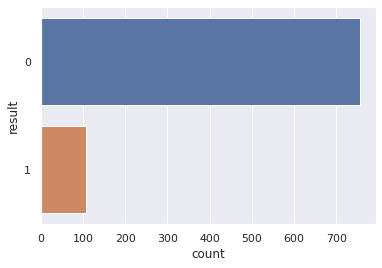

In [4]:
sns.countplot(y="result", data=df)

We notice that the label is highly unbalanced

In [5]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


Visualizations that would help us understand the data

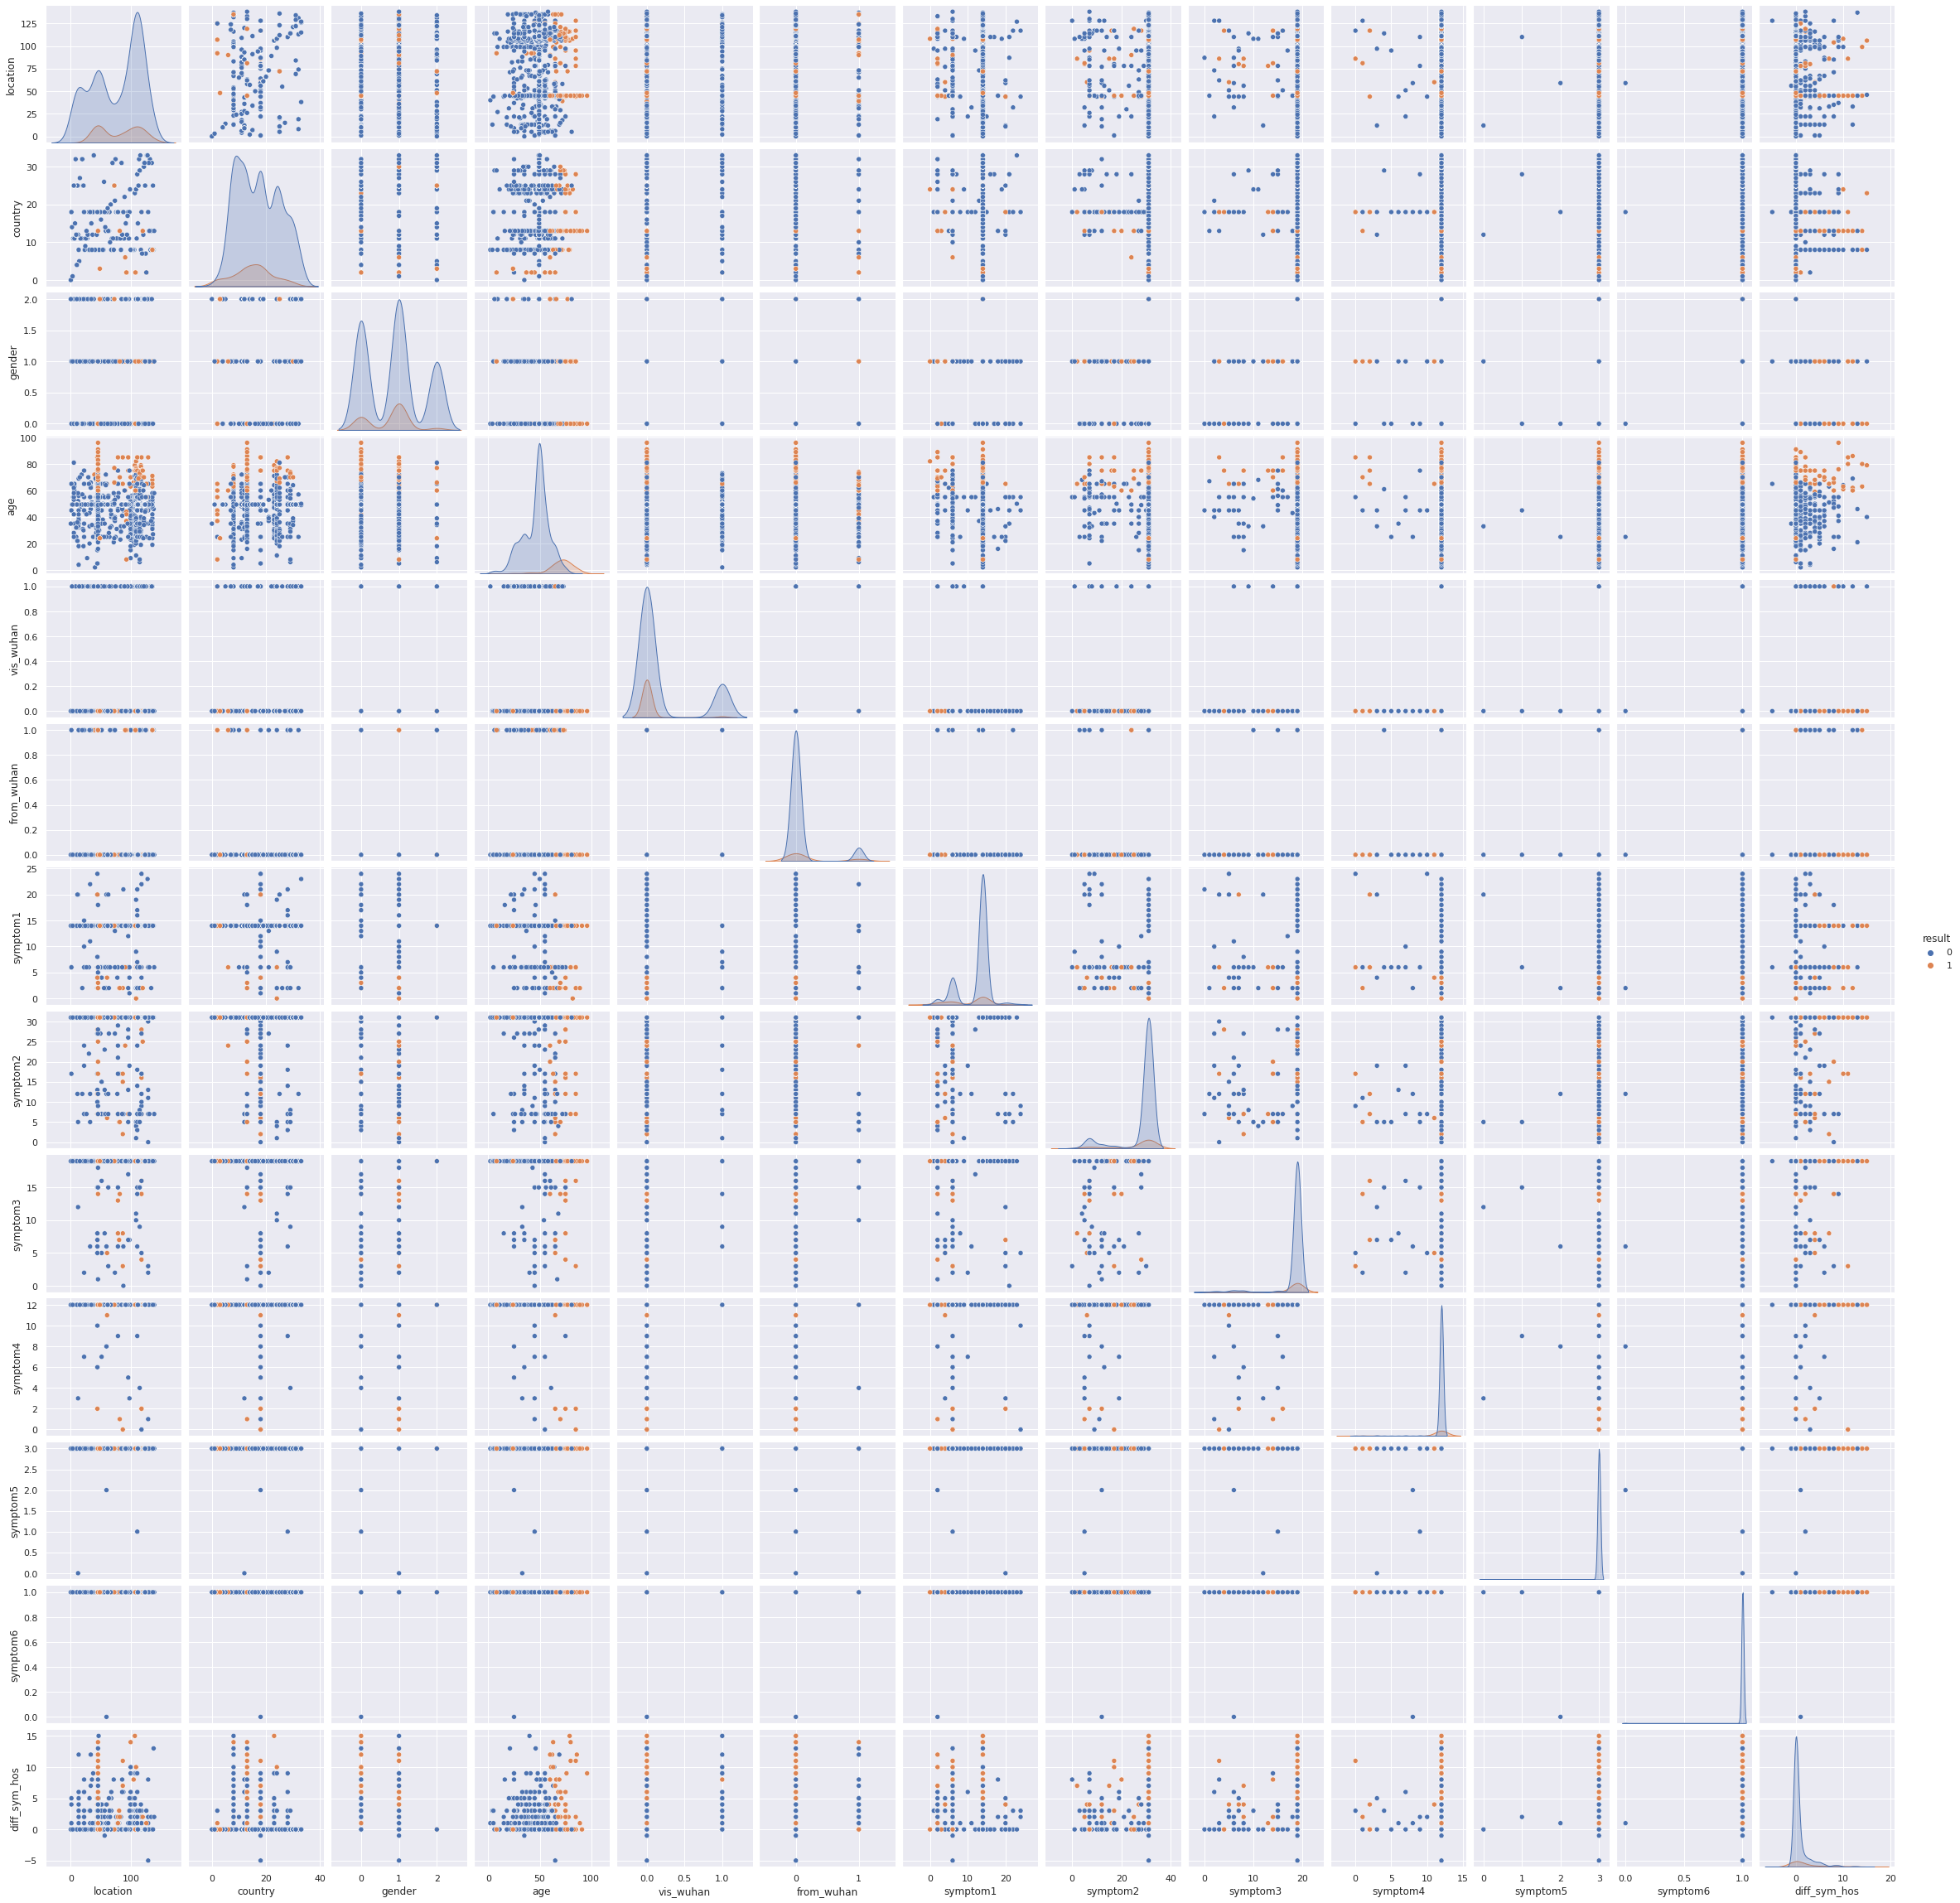

In [6]:
sns.pairplot(data=df,hue='result')

Text(0.5, 1.0, 'Correlation Matrix')

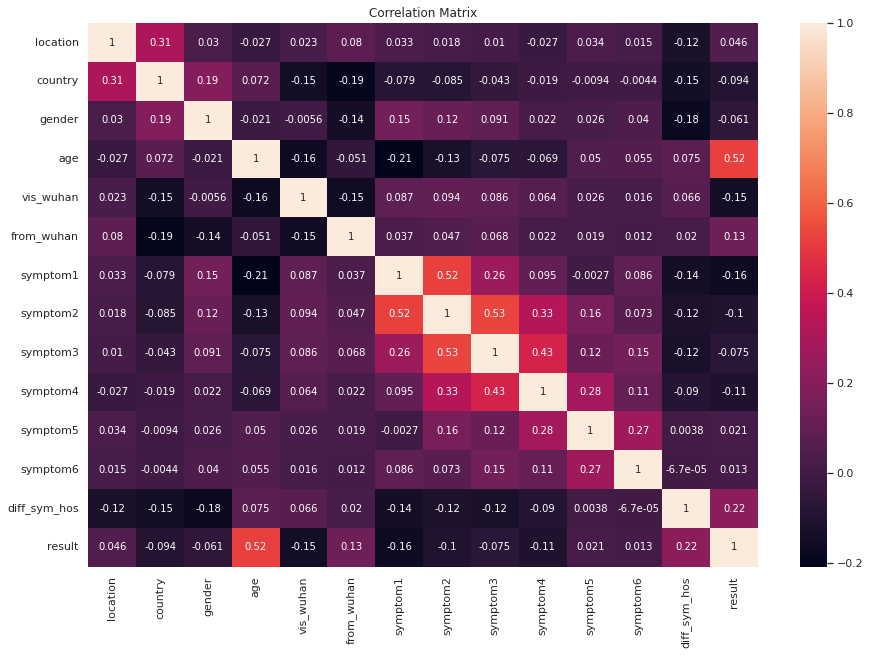

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

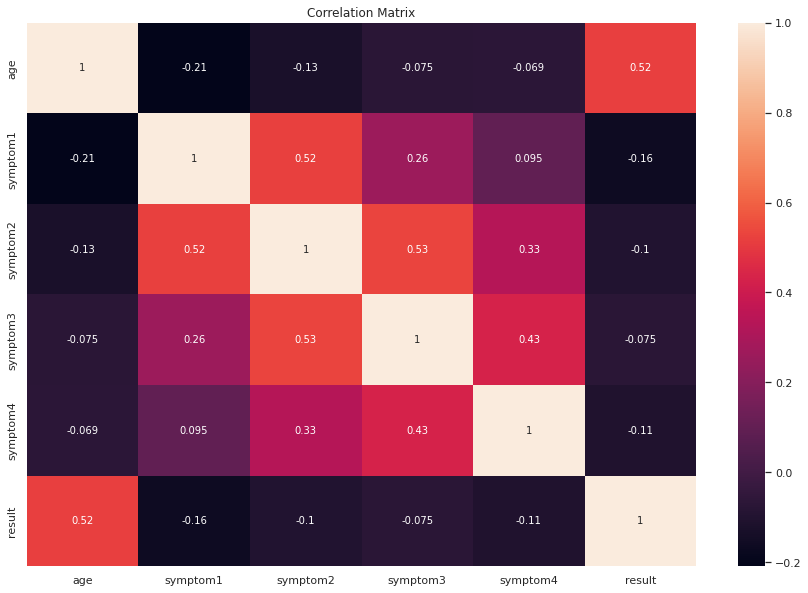

In [8]:
plt.figure(figsize=(15,10))
df_Corr=df[['age','symptom1','symptom2','symptom3','symptom4','result']]
sns.heatmap(df_Corr.corr(), annot =True)
plt.title('Correlation Matrix')

We noticed From the figures that the symptoms are highly correlated with each others. And the Age and different symptoms has the highest correlation with the result.

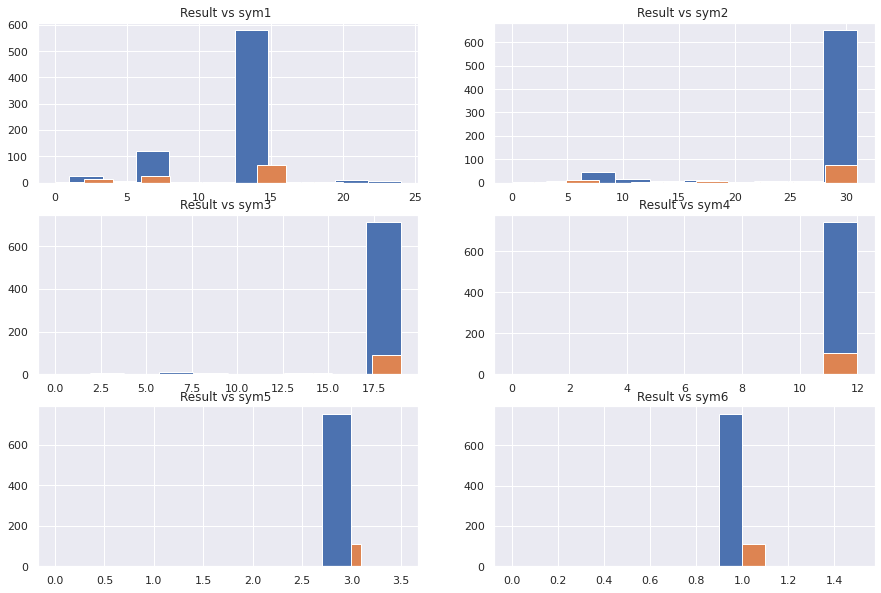

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
df.groupby('result').symptom1.hist();
plt.title('Result vs sym1 ')
plt.subplot(3,2,2)
df.groupby('result').symptom2.hist();
plt.title('Result vs sym2 ')
plt.subplot(3,2,3)
df.groupby('result').symptom3.hist();
plt.title('Result vs sym3 ')
plt.subplot(3,2,4)
df.groupby('result').symptom4.hist();
plt.title('Result vs sym4')
plt.subplot(3,2,5)
df.groupby('result').symptom5.hist();
plt.title('Result vs sym5 ')
plt.subplot(3,2,6)
df.groupby('result').symptom6.hist();
plt.title('Result vs sym6 ');

Text(0.5, 1.0, 'Result vs Age')

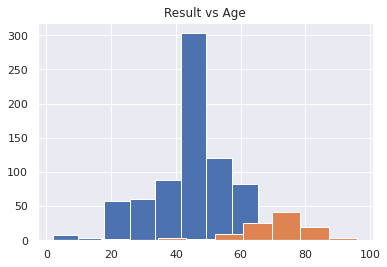

In [10]:
df.groupby('result').age.hist();
plt.title('Result vs Age')

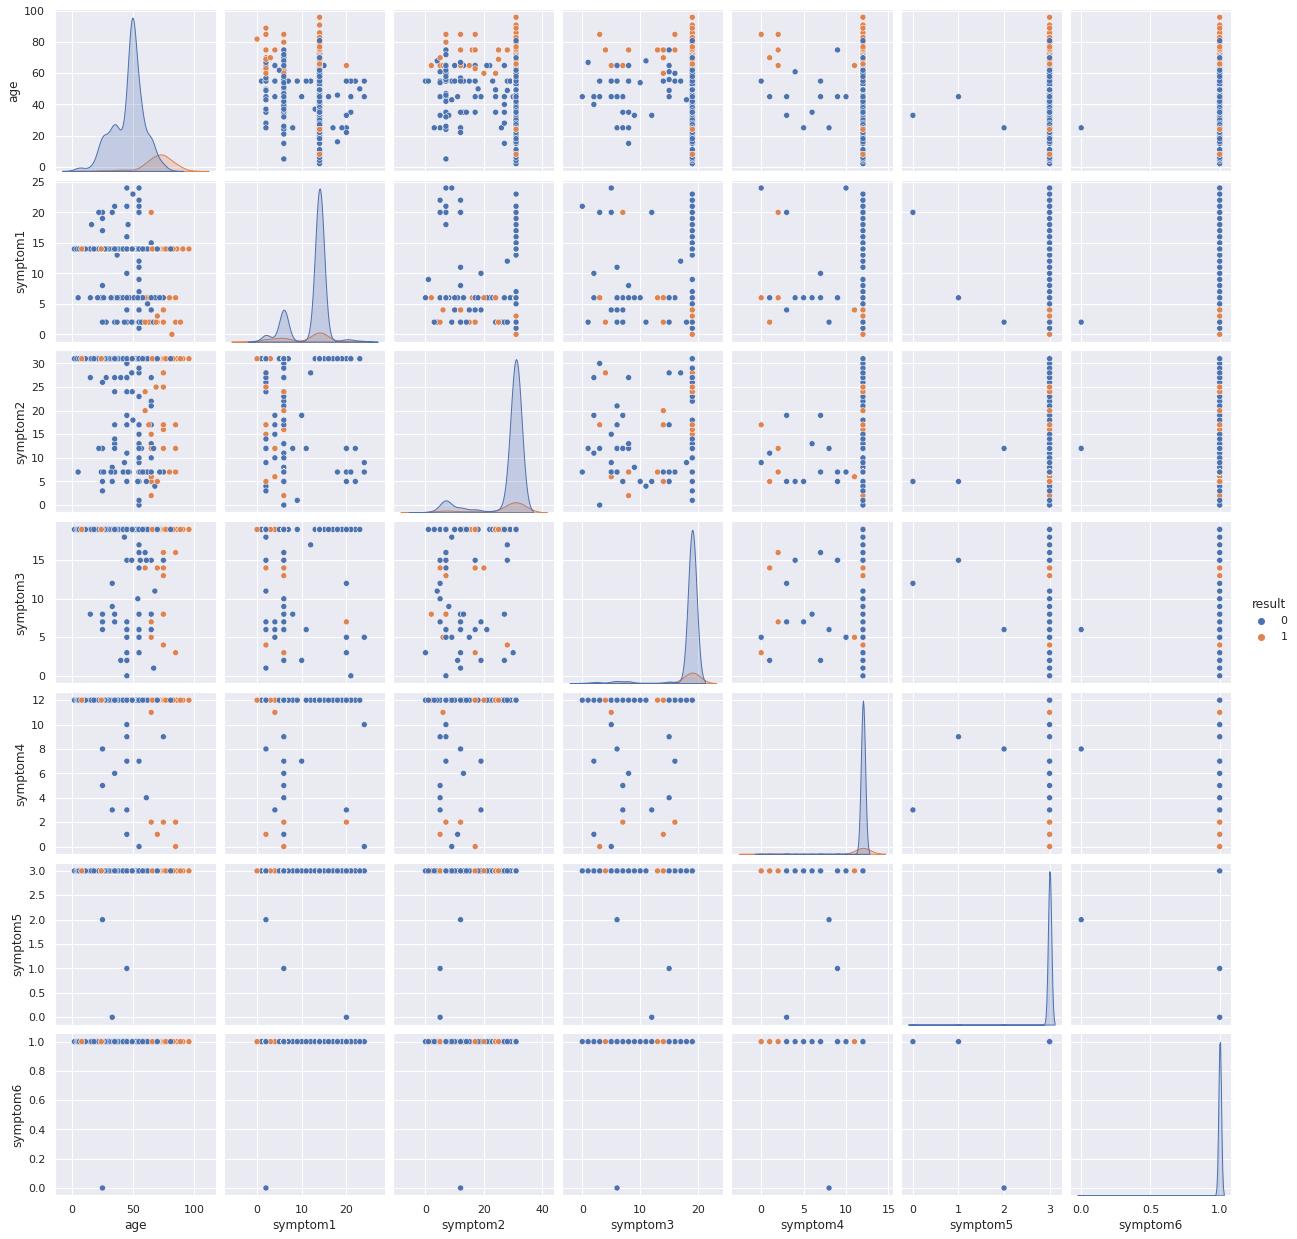

In [11]:
df_Corr2=df[['age','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','result']]
sns.pairplot(data=df_Corr2,hue='result')

In [12]:
df.drop(['location', 'country'], axis=1, inplace=True)

In [13]:
# Train Test Split
y = df['result']
X = df.drop('result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, stratify=y)
print(X_train.shape)
print(X_test.shape)

(690, 11)
(173, 11)


#Building The Models

## Hyperparameters Optimization

In [14]:
models_names = [
         "K-Nearest Neighbors",
         "Logistic Regression",
         "Naive Bayes",
         "Decision Trees",
         "Support Vector Machines"
        ]

model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=44)
model3 = ComplementNB()
model4 = DecisionTreeClassifier(random_state=44)
model5 = SVC(probability=True, random_state=44)

# KNeighborsClassifier
param1 = {}
param1['n_neighbors'] = [2,5,15,20,25,30,35,40,50]

# LogisticRegression
param2 = {}
param2['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['penalty'] = ['l1', 'l2']

# Naive Bayes
param3 = {}
param3['alpha'] = [10**0, 10**1, 10**2]

# DecisionTreeClassifier
param4 = {}
param4['max_depth'] = [2,5,10,25]
param4['min_samples_split'] = [2,5,15]

# Support Vector Machine
param5 = {}
param5['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param5['kernel'] = ['linear', 'poly','rbf', 'sigmoid']

## KNeighborsClassifier

In [15]:
gs_knn = GridSearchCV(model1, param1, cv=3,scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for KNeighborsClassifier: ", gs_knn.best_params_)

Best parameter for KNeighborsClassifier:  {'n_neighbors': 35}


In [16]:
y_pred = gs_knn.predict(X_test)

In [17]:
print(f"Classification report for KNeighborsClassifier\n with best parameters{gs_knn.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for KNeighborsClassifier
 with best parameters{'n_neighbors': 35}

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       151
           1       0.76      0.59      0.67        22

    accuracy                           0.92       173
   macro avg       0.85      0.78      0.81       173
weighted avg       0.92      0.92      0.92       173



##Logistic Regression

In [18]:
gs_lr = GridSearchCV(model2, param2, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Logistic Regression: ", gs_lr.best_params_)

Best parameter for Logistic Regression:  {'C': 100, 'penalty': 'l2'}


In [19]:
y_pred = gs_lr.predict(X_test)

In [20]:
print(f"Classification report for Logistic Regression\n with best parameters{gs_lr.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Logistic Regression
 with best parameters{'C': 100, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.80      0.55      0.65        22

    accuracy                           0.92       173
   macro avg       0.87      0.76      0.80       173
weighted avg       0.92      0.92      0.92       173



##Naive Bayes

In [21]:
scaler = MinMaxScaler()
X_trainx = scaler.fit_transform(X_train)
X_testx = scaler.fit_transform(X_test)

In [22]:
gs_nb = GridSearchCV(model3, param3, cv=3, scoring='roc_auc').fit(X_trainx, y_train)
print("Best parameter for Naïve Bayes",gs_nb.best_params_)

Best parameter for Naïve Bayes {'alpha': 10}


In [23]:
y_pred = gs_nb.predict(X_test)

In [24]:
print(f"Classification report for Naive Bayes\n with best parameters{gs_nb.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Naive Bayes
 with best parameters{'alpha': 10}

              precision    recall  f1-score   support

           0       1.00      0.04      0.08       151
           1       0.13      1.00      0.23        22

    accuracy                           0.16       173
   macro avg       0.57      0.52      0.15       173
weighted avg       0.89      0.16      0.10       173



## Decision Tree

In [25]:
gs_dt = GridSearchCV(model4, param4, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Decision Trees", gs_dt.best_params_)

Best parameter for Decision Trees {'max_depth': 5, 'min_samples_split': 15}


In [26]:
y_pred = gs_dt.predict(X_test)

In [27]:
print(f"Classification report for Decision Tree\n with best parameters{gs_dt.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Decision Tree
 with best parameters{'max_depth': 5, 'min_samples_split': 15}

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.81      0.95      0.88        22

    accuracy                           0.97       173
   macro avg       0.90      0.96      0.93       173
weighted avg       0.97      0.97      0.97       173



## Support Vector Machines (SVM)

In [28]:
gs_sv = GridSearchCV(model5, param5, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for SVM", gs_sv.best_params_)

Best parameter for SVM {'C': 100, 'kernel': 'rbf'}


In [29]:
y_pred = gs_sv.predict(X_test)

In [30]:
print(f"Classification report for Support Vector Machines\n with best parameters{gs_sv.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Support Vector Machines
 with best parameters{'C': 100, 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       151
           1       0.84      0.73      0.78        22

    accuracy                           0.95       173
   macro avg       0.90      0.85      0.88       173
weighted avg       0.95      0.95      0.95       173



# Show The Performance Of All Classifiers

In [31]:
classifiers = [gs_knn, gs_lr, gs_nb, gs_dt, gs_sv]
results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
i=0
for cls in classifiers:
    if(cls!=gs_nb):
        yproba = cls.predict_proba(X_test)[::,1]
    else:
        yproba = cls.predict_proba(X_testx)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)  
    results = results.append({'classifiers':models_names[i], 'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)
    i+=1
results.set_index('classifiers', inplace=True)

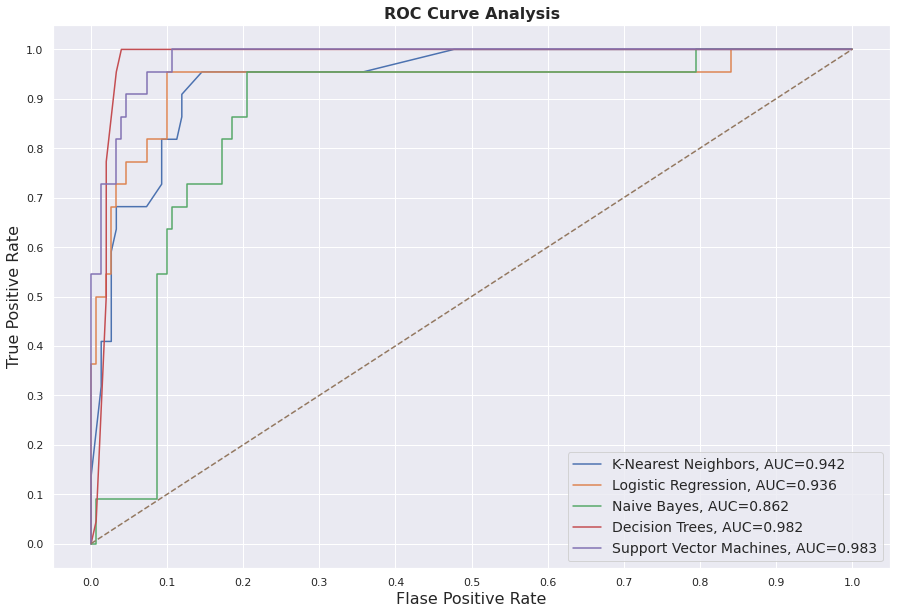

In [32]:
fig = plt.figure(figsize=(15,10))
for i in models_names:
    plt.plot(results.loc[i]['fpr'], 
             results.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, results.loc[i]['auc']))

plt.plot([0,1], [0,1], linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=16)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=16)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=16)
plt.legend(prop={'size':14}, loc='lower right')

plt.show()

It is clear that the best model is **Support Vector Machines (SVM)**, although Decision Tree is very close to it